In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
def Analytic(choise = "Все"):
    WaterBase = pd.read_csv("water.csv")
    del WaterBase['Unnamed: 0']
    plt.figure(figsize=(10, 20))
    plt.subplot(3,1,1)
    if choise == 'Север':
        WaterBase = WaterBase[WaterBase['location'] == 'North']
    elif choise == 'Юг':
        WaterBase = WaterBase[WaterBase['location'] == 'South']
    elif choise != "Все":
        raise Exception("Неверный аргумент")
    plt.scatter(WaterBase['hardness'], WaterBase['mortality'])
    plt.xlabel('Жёсткость воды')
    plt.ylabel('Средняя годовая смертность')
    plt.title('Точечный график')
    #коэф Пирсона
    print("Коэф. Пирсона = ", WaterBase[['mortality', 'hardness']].corr().iloc[0]['hardness'])
    #коэф Спирмана
    print("Коэф. Спирмана = ", WaterBase[['mortality', 'hardness']].corr(method = 'spearman').iloc[0]['hardness'])
    x = WaterBase[['hardness']]
    y = WaterBase['mortality']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.45, random_state = 150)
    model = LinearRegression()
    model.fit(x_train, y_train)
    #коэф детерминации
    print("Коэф. детерминации = ", model.score(x_test, y_test))
    y_pred = model.predict(x_test)
    plt.subplot(3,1,2)
    plt.scatter(x, y)
    plt.plot(x_test, y_pred, c = 'r')
    plt.title('Наша модель и реальные данные')
    plt.subplot(3,1,3)
    plt.scatter(x_test, (y_pred - y_test))
    plt.title('График остатков')
    plt.show()

Коэф. Пирсона =  -0.6548486232042469
Коэф. Спирмана =  -0.6316646189166502
Коэф. детерминации =  0.3323954707400788


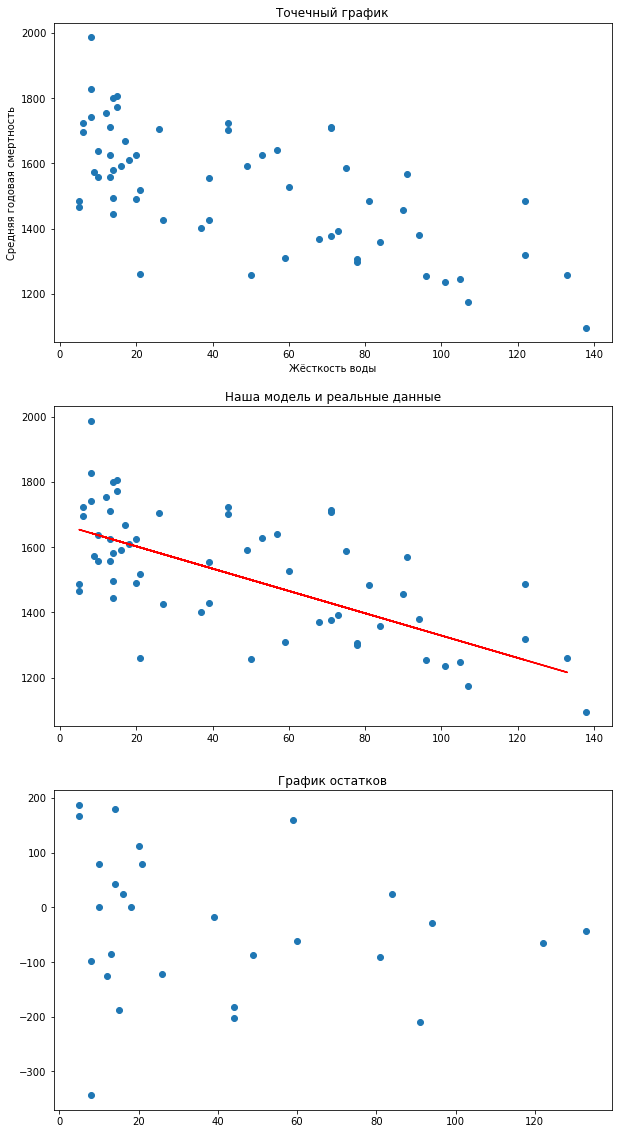

Коэф. Пирсона =  -0.3685978383288716
Коэф. Спирмана =  -0.4042078956511175
Коэф. детерминации =  0.12235023837976777


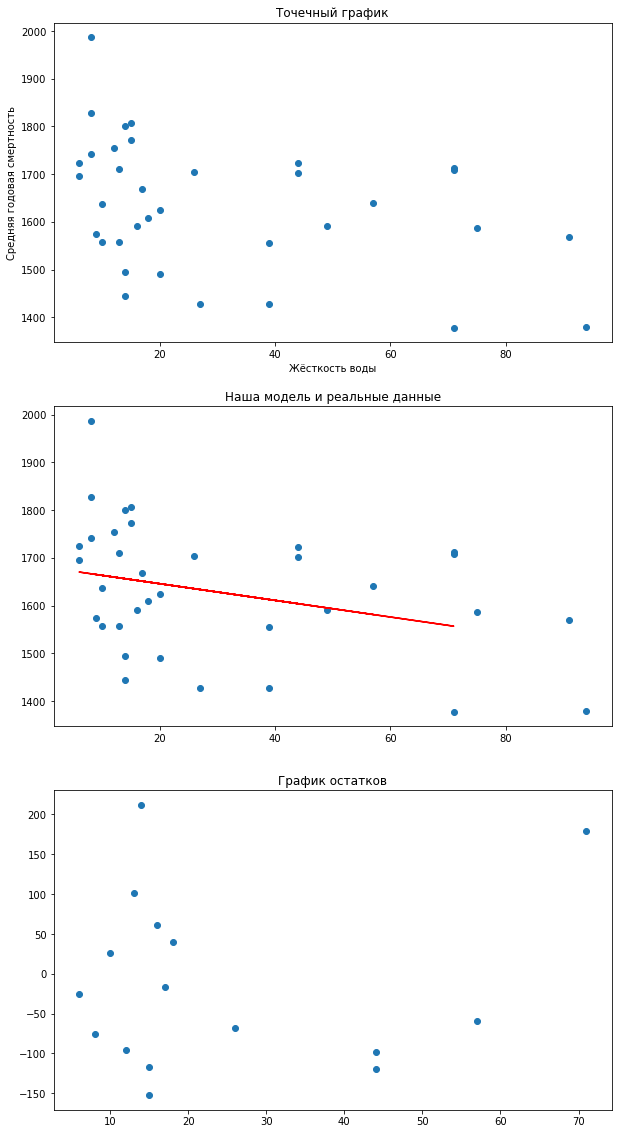

Коэф. Пирсона =  -0.6021532715484159
Коэф. Спирмана =  -0.5957229185013566
Коэф. детерминации =  0.05547716774294975


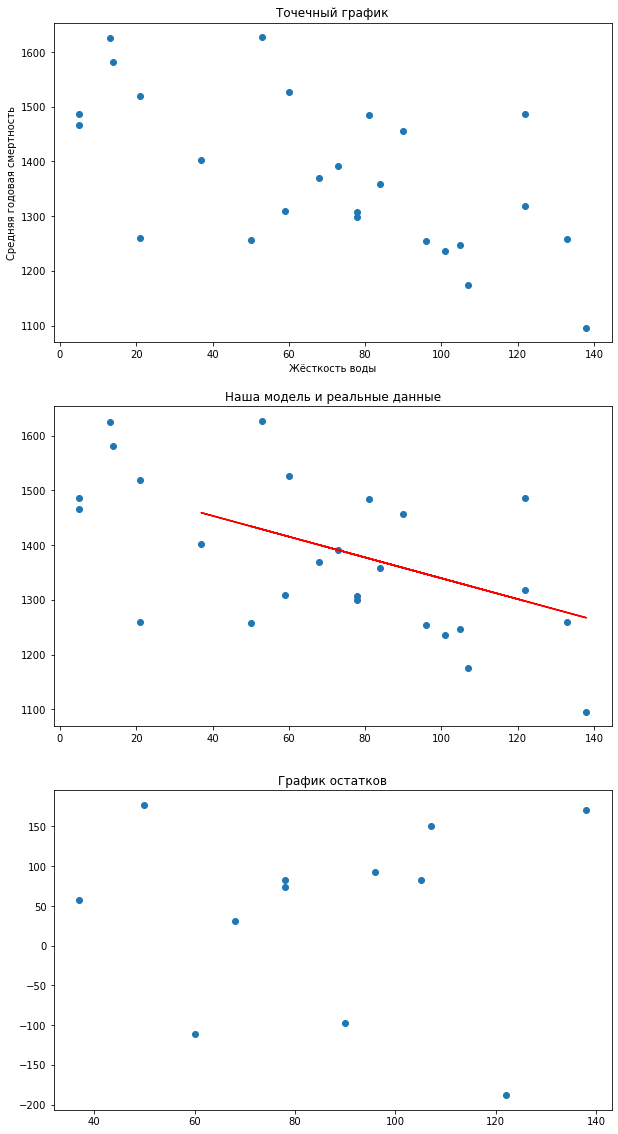

In [7]:
try:
    Analytic()
    Analytic("Север")
    Analytic("Юг")
except Exception as e:
    print(e)

До разделения районов на северные и южные можно сделать вывод, что годовая смертность зависит от тяжести воды, но после разделения на северные и южные районы становится понятно, что корелляции между этими величинами нет, а данные подобраны так, что до их разделения создаётся впечатление о существующей между ними корелляции, хоть это и не так